In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("./miles-driven.csv")

In [52]:
df.info

<bound method DataFrame.info of                    state  million_miles_annually
0                Alabama                   64914
1                 Alaska                    4593
2                Arizona                   59575
3               Arkansas                   32953
4             California                  320784
5               Colorado                   46606
6            Connecticut                   31197
7               Delaware                    9028
8   District of Columbia                    3568
9                Florida                  191855
10               Georgia                  108454
11                Hawaii                   10066
12                 Idaho                   15937
13              Illinois                  103234
14               Indiana                   76485
15                  Iowa                   31274
16                Kansas                   30021
17              Kentucky                   48061
18             Louisiana             

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes
None


In [54]:
df2=pd.read_csv("./road-accidents.csv")

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [56]:
#can be merged on state 

In [ ]:
#but first lets compute  df and df2 internally

In [57]:
import seaborn as sns
%matplotlib inline 

In [58]:
#summary statistics of df
sum_stats=df.describe()
print(sum_stats)

       million_miles_annually
count               51.000000
mean             57851.019608
std              59898.414088
min               3568.000000
25%              17450.000000
50%              46606.000000
75%              71922.500000
max             320784.000000


In [59]:
#summary statistics of df2
sum_stats2=df2.describe()
print(sum_stats2)

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


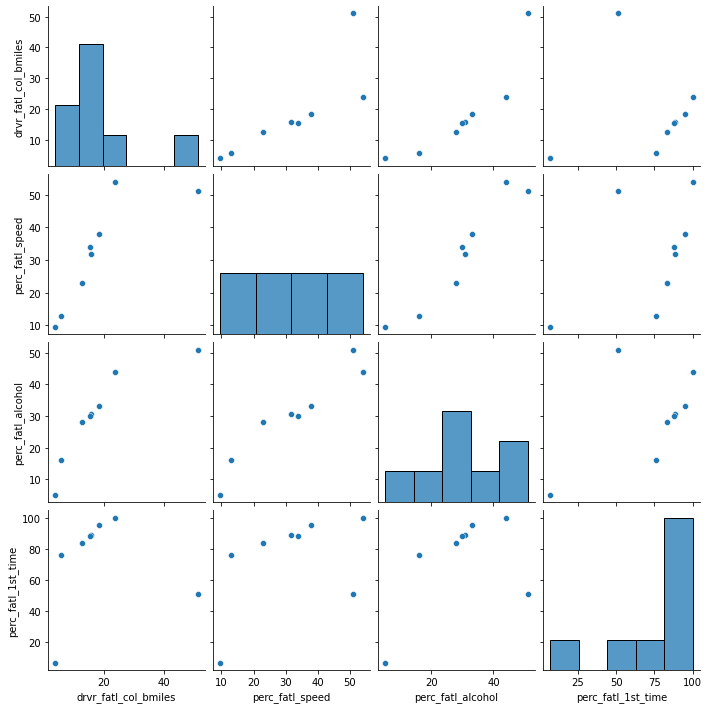

In [60]:
sns.pairplot(sum_stats2) ##no use of getting the same plot for df 

In [ ]:
## we can observe that perc of drivers involved in fatal accidents per billion mile due to alcohol are little more than due to speeding

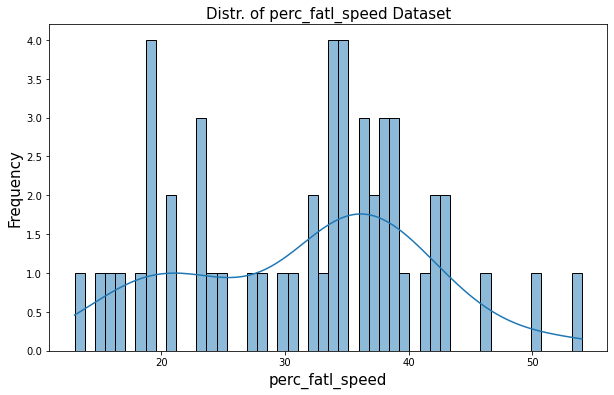

In [63]:
plt.figure(figsize=(10, 6))  ##testing the obs thru histogram

sns.histplot(x='perc_fatl_speed', data=df2, bins=50, kde=True)

## title and axis
plt.title('Distr. of perc_fatl_speed Dataset', fontsize=15)
plt.xlabel('perc_fatl_speed', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

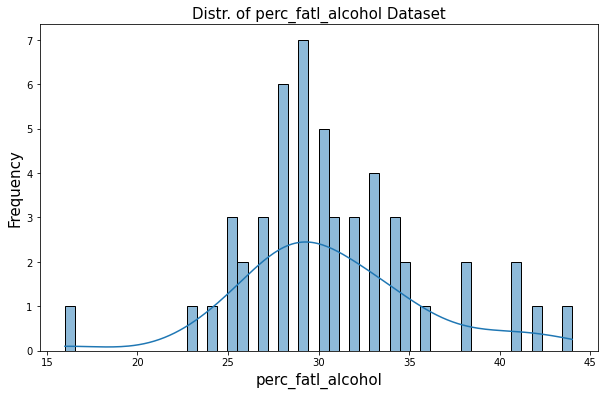

In [65]:
plt.figure(figsize=(10, 6))   

sns.histplot(x='perc_fatl_alcohol', data=df2, bins=50, kde=True)

## title and axis
plt.title('Distr. of perc_fatl_alcohol Dataset', fontsize=15)
plt.xlabel('perc_fatl_alcohol', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

C:\Users\cheha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drvr_fatl_col_bmiles', ylabel='perc_fatl_speed'>

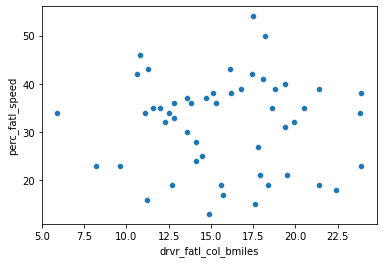

In [70]:
sns.scatterplot(df2['drvr_fatl_col_bmiles'],df2['perc_fatl_speed'])

C:\Users\cheha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drvr_fatl_col_bmiles', ylabel='perc_fatl_alcohol'>

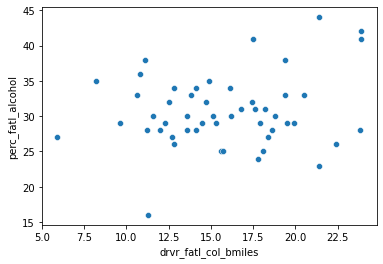

In [71]:
sns.scatterplot(df2['drvr_fatl_col_bmiles'],df2['perc_fatl_alcohol'])

In [ ]:
##observation true

In [ ]:
## checking for correlations bw the columns in df2

In [66]:
corr_columns=df2.corr()

In [67]:
corr_columns
#0.2 = weak
#0.5 = medium
#0.8 = strong
#0.9 = very strong

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [73]:
# Importing the linear model 
from sklearn import linear_model

# Create the features and target DataFrames
features = df2[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = df2['drvr_fatl_col_bmiles']


reg = linear_model.LinearRegression() # Creating a linear regression object


reg.fit(features, target)
# fitting a multivariate linear regression model

fit_coef = reg.coef_ # retrieving the regression coefficients

fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features) ##standardizing the feature column

In [91]:
from sklearn.decomposition import PCA
pca = PCA() #Import the PCA class function from sklearn

In [92]:
pca.fit(features_scaled)

PCA()

In [93]:
print(pca.components_)

[[ 0.53455662  0.71358084 -0.45282624]
 [-0.65077841  0.00570541 -0.75924627]
 [ 0.53920003 -0.70054967 -0.46743287]]


In [94]:
print(pca.explained_variance_)

[1.39759626 1.0341792  0.62822455]


ValueError: too many values to unpack (expected 2)

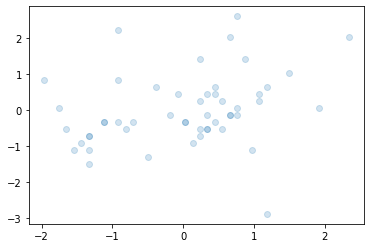

In [80]:
## understanding the components and their importance thru vector length of variance
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

([<matplotlib.axis.XTick at 0x240b21b6e20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

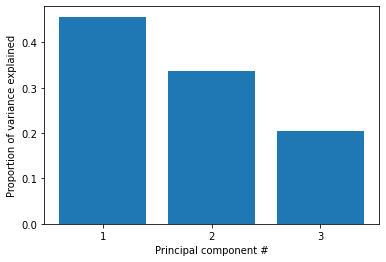

In [95]:
## trying other way
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_) #proportion of variance explained on the y-axis of the bar plot
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

In [97]:
print(pca.explained_variance_ratio_)

[0.4567308  0.33796706 0.20530214]


In [96]:
#Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

The cumulative variance of the first two principal components is 0.7947


In [ ]:
#transforming the scaled features using two principal components

In [98]:
pca=PCA(n_components=2) ##taking top 2 components

In [99]:
p_comps = pca.fit_transform(features_scaled)

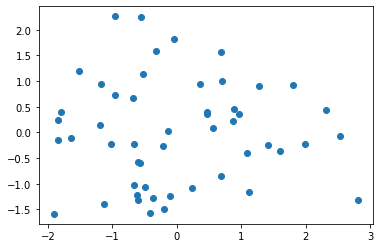

In [100]:
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

In [101]:
print(p_comp1)

[ 0.88463912 -0.62529903 -0.67169596 -1.83954608 -0.21174283 -0.49390467
  1.98805561 -0.41984695 -1.13099129 -1.18444358 -1.79251216  2.80996806
 -0.60664618  0.2268846  -1.02598376 -1.51035032 -0.95893975 -0.95632936
 -0.10099555  0.56576691 -0.36316811  0.6900851  -0.03971211 -0.67811433
 -1.63409399  1.40766864  2.52202483 -0.52740931 -0.19504256  0.46334895
 -0.5537545  -1.84020388  0.35192305  0.95935465  1.27880139  0.69845606
 -0.56798322 -0.67038036  1.11586188  1.79352241  2.30754399  0.46332813
 -0.3302449   1.60411279 -1.90843858 -0.60535139 -1.18312797  1.07978849
 -0.1363695   0.87495256  0.67653501]


C:\Users\cheha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[152.99999999999994, 101.59081556315157, 72.39839077808162, 57.80472652795008, 46.10580914149266, 40.08628172516375, 33.476812943257585, 29.568317670408543, 26.70102655251705]


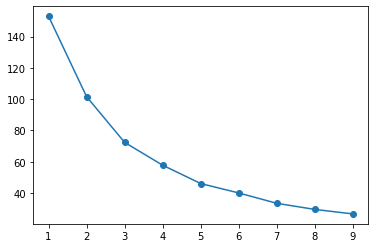

In [103]:
from sklearn.cluster import KMeans


ks = range(1, 10) # Using a loop to plot the explanatory power for up to 10 KMeans clusters
inertias = []
for k in ks:
   
    km = KMeans(n_clusters=k, random_state=98)  # Initializing KMeans object using the current number of clusters (k)
  
    km.fit(features_scaled)   # Fitting the scaled features to the KMeans object
   
    inertias.append(km.inertia_ )  #appending the inertia for 'km' to the list of inertias
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')
print(inertias)

In [104]:
# creating a KMeans object with 3 clusters, use random_state=98 
km = KMeans(n_clusters = 3, random_state = 98)

In [105]:
km.fit(features_scaled)
# Fit the data to the `km` object

KMeans(n_clusters=3, random_state=98)

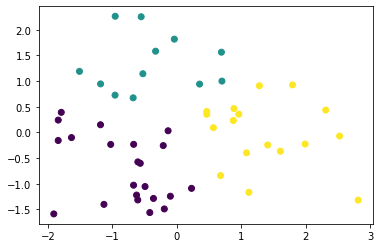

In [106]:
plt.scatter(p_comps[:, 0], p_comps[:, 1], c = km.labels_)
# Creating a scatter plot of the first two principal components
# coloring it according to the KMeans cluster assignment 

In [107]:
df2['cluster_column']=km.labels_
#creating a new column for the labels

In [120]:
melt_df2 = pd.melt(df2, id_vars = ['cluster_column'], value_name = 'percent' , var_name ='measurement', 
                                                   value_vars =[ 'perc_fatl_alcohol','perc_fatl_speed', 'perc_fatl_1st_time'])

# reshaping the dataFrame to the long format

C:\Users\cheha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percent', ylabel='measurement'>

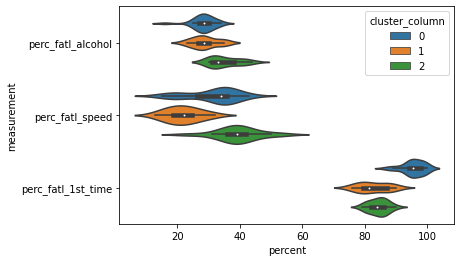

In [121]:
sns.violinplot(melt_df2['percent'], melt_df2['measurement'], hue = melt_df2['cluster_column'])
# Creating a violin plot splitting and coloring the results according to the km-clusters

In [114]:
## merging the two files

In [122]:
merged = df2.merge(df,on ='state')

In [123]:
merged ['num_drivers_fatl_column']=(merged['drvr_fatl_col_bmiles'] * merged['million_miles_annually']) / 1000
## creating a new column for the number of drivers involved in fatal accidents

In [124]:
display(merged.head())

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster_column,million_miles_annually,num_drivers_fatl_column
0,Alabama,18.8,39,30,80,2,64914,1220.3832
1,Alaska,18.1,41,25,94,0,4593,83.1333
2,Arizona,18.6,35,28,96,0,59575,1108.0950
3,Arkansas,22.4,18,26,95,0,32953,738.1472
4,California,12.0,35,28,89,0,320784,3849.4080


In [125]:
basic_measures = merged.groupby('cluster_column')['num_drivers_fatl_column'].agg(['count', 'mean', 'sum'])
basic_measures
##seeing the basic measures like mean, sum, count in different clusters


,count,mean,sum
cluster_column,,,
0,22,898.378595,19764.3291
1,12,920.385367,11044.6244
2,17,872.132759,14826.2569


<AxesSubplot:xlabel='cluster_column', ylabel='num_drivers_fatl_column'>

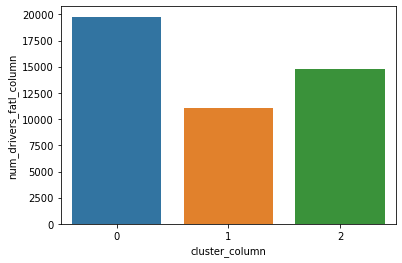

In [150]:
##total number of accidents per cluster
sns.barplot(x='cluster_column', y='num_drivers_fatl_column', data=merged, estimator=sum, ci=None)

In [154]:
merged.cluster_column

0     2
1     0
2     0
3     0
4     0
5     0
6     2
7     0
8     0
9     0
10    0
11    2
12    0
13    0
14    0
15    1
16    1
17    1
18    0
19    2
20    0
21    1
22    1
23    1
24    0
25    2
26    2
27    1
28    0
29    2
30    1
31    0
32    1
33    2
34    2
35    1
36    0
37    0
38    2
39    2
40    2
41    2
42    1
43    2
44    0
45    0
46    1
47    2
48    0
49    2
50    2
Name: cluster_column, dtype: int32

### FINAL OBSERVATION

1. cluster 0 probably has more importance

### ROUGH WORK

In [87]:
pca.fit(features_scaled)

PCA(n_components=2)

In [88]:
print(pca)

PCA(n_components=2)


In [89]:
print(pca.components_)

[[ 0.53455662  0.71358084 -0.45282624]
 [-0.65077841  0.00570541 -0.75924627]]


In [90]:
print(pca.explained_variance_)

[1.39759626 1.0341792 ]


In [35]:
x = np.random.rand(3,2)

 

In [37]:

x = x[:,1]

In [36]:
x

array([[0.55706465, 0.06491681],
       [0.70815106, 0.92145323],
       [0.78880241, 0.85969412]])

In [38]:
x

array([0.06491681, 0.92145323, 0.85969412])

In [32]:
x=x[:1]

In [33]:
x

array([[0.89458421, 0.79646859]])

In [15]:
x=x[:,0]

In [16]:
x

array([0.47561998, 0.64251547, 0.54855972])

In [26]:
x=x[1:]

In [27]:
x

array([[0.13825225, 0.75988321],
       [0.84450159, 0.70411968]])

In [39]:
y= np.random.rand(3,2)

In [40]:
y

array([[0.40983405, 0.2401772 ],
       [0.8848098 , 0.28624525],
       [0.11412552, 0.87415713]])

In [41]:
z=y[:,1]

In [42]:
z

array([0.2401772 , 0.28624525, 0.87415713])

In [43]:
g=y[:1]

In [44]:
g

array([[0.40983405, 0.2401772 ]])

In [45]:
q=y[1:]

In [46]:
q

array([[0.8848098 , 0.28624525],
       [0.11412552, 0.87415713]])

In [47]:
f=y[1,:]

In [48]:
f

array([0.8848098 , 0.28624525])